In [1]:
"""
Some analysis with chi2
"""

#Import libraries
import numpy as np
from scipy.interpolate import interp1d
from scipy.constants import c as c_luz #meters/seconds
c_luz_km = c_luz/1000

import os
import git
path_git = git.Repo('.', search_parent_directories=True).working_tree_dir

os.chdir(path_git); os.sys.path.append('./fr_mcmc/utils/')
from solve_sys import Hubble_th
from supernovae import aparent_magnitude_th, chi2_supernovae
from BAO import r_drag, Hs_to_Ds, Ds_to_obs_final
from AGN import zs_2_logDlH0
from chi_square import params_to_chi2
from matplotlib import pyplot as plt

In [2]:
#Import data

path_git = git.Repo('.', search_parent_directories=True).working_tree_dir
os.chdir(path_git); os.sys.path.append('./fr_mcmc/utils/')
from data import read_data_pantheon_plus_shoes, read_data_pantheon_plus, read_data_pantheon,\
                    read_data_chronometers, read_data_BAO, read_data_AGN

# Pantheon plus + SH0ES
os.chdir(path_git+'/fr_mcmc/source/Pantheon_plus_shoes')
ds_SN_plus_shoes = read_data_pantheon_plus_shoes('Pantheon+SH0ES.dat',
                                'Pantheon+SH0ES_STAT+SYS.cov')

# Pantheon plus
os.chdir(path_git+'/fr_mcmc/source/Pantheon_plus_shoes')
ds_SN_plus = read_data_pantheon_plus('Pantheon+SH0ES.dat',
                            'covmat_pantheon_plus_only.npz')

# Pantheon
os.chdir(path_git+'/fr_mcmc/source/Pantheon/')
ds_SN = read_data_pantheon('lcparam_full_long_zhel.txt')

# Cosmic Chronometers
os.chdir(path_git+'/fr_mcmc/source/CC/')
ds_CC = read_data_chronometers('chronometers_data.txt')

# BAO
os.chdir(path_git+'/fr_mcmc/source/BAO/')
ds_BAO = []
files_BAO = ['BAO_data_da.txt','BAO_data_dh.txt','BAO_data_dm.txt',
                'BAO_data_dv.txt','BAO_data_H.txt']
for i in range(5):
    aux = read_data_BAO(files_BAO[i])
    ds_BAO.append(aux)

# AGN
os.chdir(path_git+'/fr_mcmc/source/AGN')
ds_AGN = read_data_AGN('table3.dat')

In [3]:
#Estimate some chi2
some_chi2 = params_to_chi2([-19.37, 0.3, 70], 0.01, index=32,
                dataset_SN_plus_shoes = ds_SN_plus_shoes,
                #dataset_SN_plus = ds_SN_plus,
                #dataset_SN = ds_SN,
                #dataset_CC = ds_CC,
                #dataset_BAO = ds_BAO,
                #dataset_AGN = ds_AGN,
                #H0_Riess = True,
                model = 'HS'
                )
print(some_chi2)

1482.6818891351295


1701 3 1698


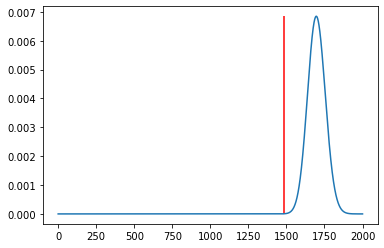

In [4]:
from scipy.stats import chi2
N = len(ds_SN_plus_shoes[0])
P = 3
df = N - P
print(N, P, df)

x = np.linspace(0,2000, 10**5)
y = chi2.pdf(x, df, loc=0, scale=1)
plt.vlines(some_chi2,0,np.max(y),'r')
plt.plot(x,y)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


21


/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/matias/anaconda3/envs/fR-MCMC/lib/python3.7/site-packages/ipykernel_launcher.py:64: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


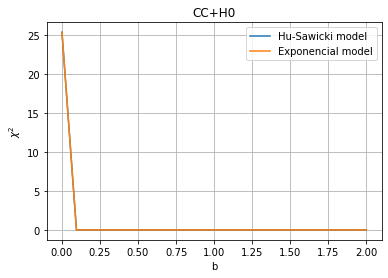

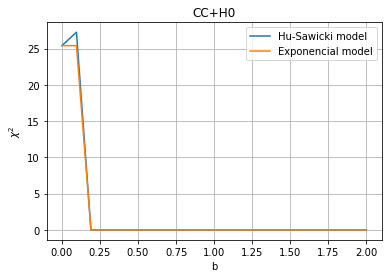

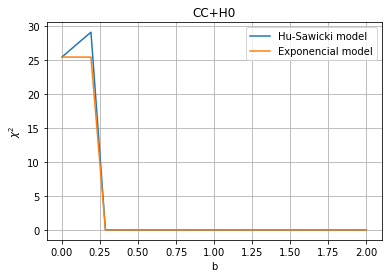

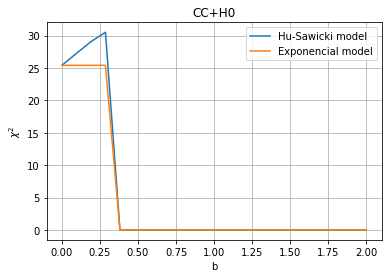

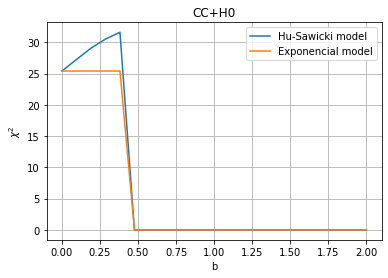

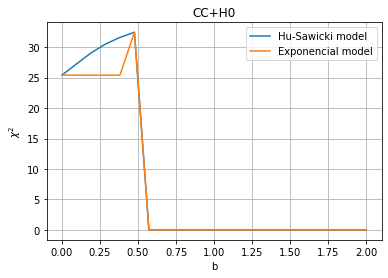

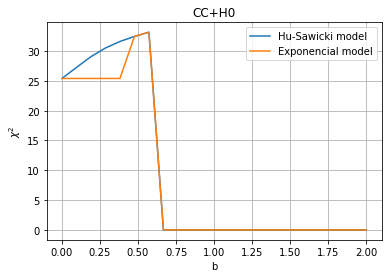

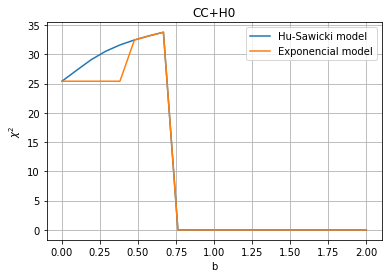

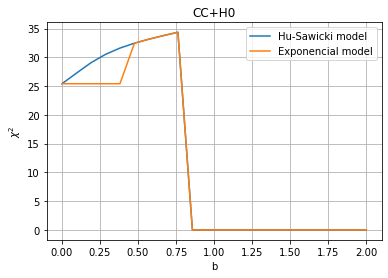

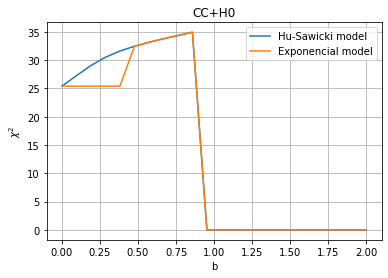

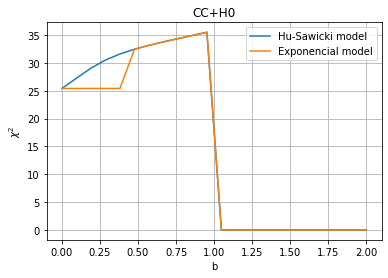

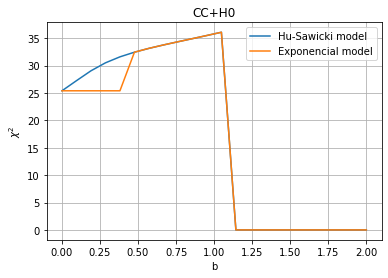

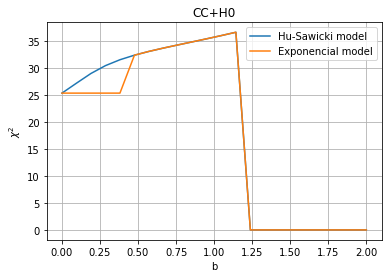

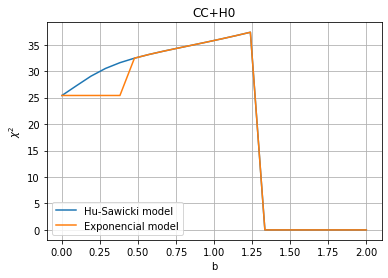

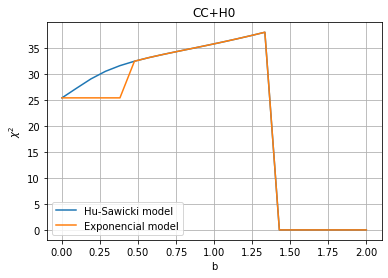

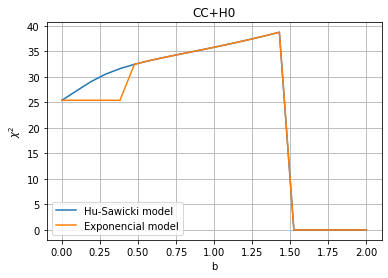

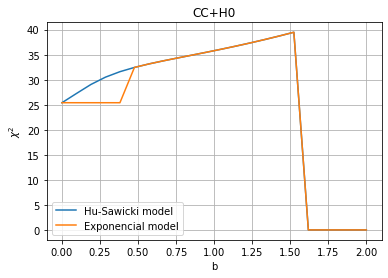

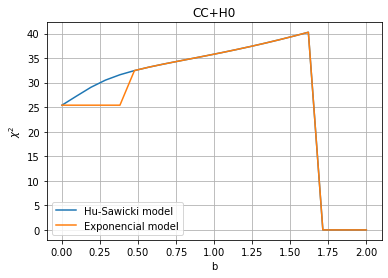

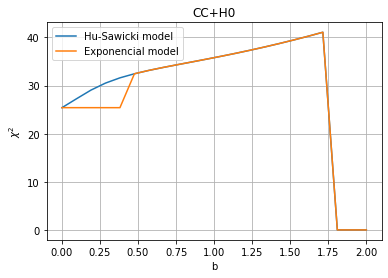

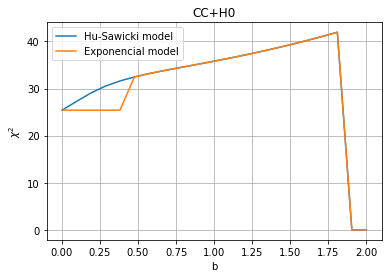

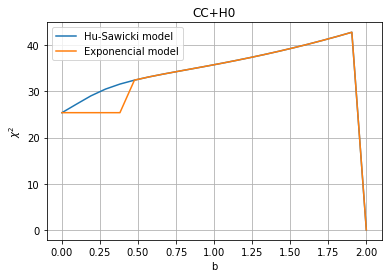

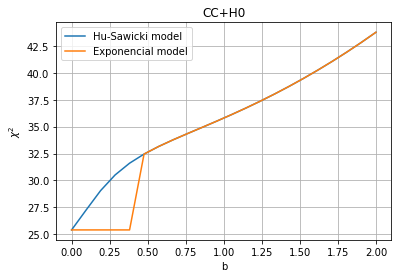

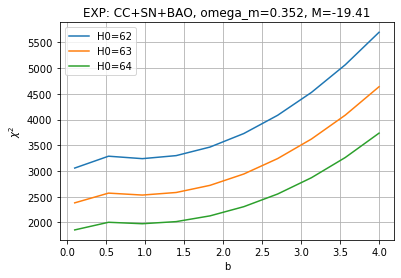

In [5]:
bs = np.linspace(0,2,22)
chies_HS = np.zeros(len(bs))
chies_EXP = np.zeros(len(bs))
for (i,b) in enumerate(bs):
    chies_EXP[i] = params_to_chi2([0.325,b,68], -19.35, index=31,
                    #dataset_SN = ds_SN,
                    dataset_CC = ds_CC,
                    #dataset_BAO = ds_BAO,
                    #dataset_AGN = ds_AGN,
                    H0_Riess = True,
                    model = 'EXP'
                    )
    chies_HS[i] = params_to_chi2([0.325,b,68], -19.35, index=31,
                    #dataset_SN = ds_SN,
                    dataset_CC = ds_CC,
                    #dataset_BAO = ds_BAO,
                    #dataset_AGN = ds_AGN,
                    H0_Riess = True,
                    model = 'HS'
                    )
    print(i)

    plt.figure()
    plt.title('CC+H0')
    plt.ylabel(r'$\chi^2$')
    plt.xlabel('b')
    plt.grid(True)
    plt.plot(bs,chies_HS,label = 'Hu-Sawicki model')
    plt.plot(bs,chies_EXP,label = 'Exponencial model')
    plt.legend()

#%%
bs = np.linspace(0.1,4,10)
chis_1 = np.zeros(len(bs))
chis_2 = np.zeros(len(bs))
chis_3 = np.zeros(len(bs))
for (i,b) in enumerate(bs):
    chis_1[i] = params_to_chi2([-19.41, 0.352, b, 62], 0, index=4,
                dataset_SN = ds_SN,
                dataset_CC = ds_CC,
                dataset_BAO = ds_BAO,
                #dataset_AGN = ds_AGN,
                #H0_Riess = True,
                model = 'EXP'
                )
    chis_2[i] = params_to_chi2([-19.41, 0.352, b, 63], 0, index=4,
                dataset_SN = ds_SN,
                dataset_CC = ds_CC,
                dataset_BAO = ds_BAO,
                #dataset_AGN = ds_AGN,
                #H0_Riess = True,
                model = 'EXP'
                )

    chis_3[i] = params_to_chi2([-19.41, 0.352, b, 64], 0, index=4,
                dataset_SN = ds_SN,
                dataset_CC = ds_CC,
                dataset_BAO = ds_BAO,
                #dataset_AGN = ds_AGN,
                #H0_Riess = True,
                model = 'EXP'
                )
#%%
plt.figure()
plt.title('EXP: CC+SN+BAO, omega_m=0.352, M=-19.41')
plt.grid(True)
plt.plot(bs,chis_1,label='H0=62')
plt.plot(bs,chis_2,label='H0=63')
plt.plot(bs,chis_3,label='H0=64')
plt.ylabel(r'$\chi^2$')
plt.xlabel('b')
plt.legend()